# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:

def Kel_to_Fahr(temp):
    return 273.5 + ((temp - 32.0) * (5.0/9.0)) 
    

cityWeather_Df = pd.DataFrame(columns = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])


calls = 0
idx = 0
error = 0
erroredCities = []


for city in cities:
    try:
    
        api_endpoint = "https://api.openweathermap.org/data/2.5/weather?q={}&appid={}".format(city,weather_api_key)
        res = requests.get(api_endpoint)
        data = res.json()



        MaxTemp = data['main']['temp_max']
        Humidity = data['main']['humidity']
        Cloudiness = data['clouds']['all']
        WindSpeed = data['wind']['speed']
        Country = data['sys']['country']
        Date = datetime.fromtimestamp(data['dt']).strftime('%Y-%m-%d %H:%M:%S')
        Lng = data['coord']['lon']
        Lat = data['coord']['lat']

        cityWeather_Df.at[idx, "City"] = city
        cityWeather_Df.at[idx, "Cloudiness"] = Cloudiness
        cityWeather_Df.at[idx, "Country"] = Country
        cityWeather_Df.at[idx, "Date"] = Date
        cityWeather_Df.at[idx, "Max Temp"] = MaxTemp
        cityWeather_Df.at[idx, "Wind Speed"] = WindSpeed
        cityWeather_Df.at[idx, "Lat"] = Lat
        cityWeather_Df.at[idx, "Lng"] = Lng
        cityWeather_Df.at[idx, "Humidity"] = Humidity

        idx = idx +1
    except Exception as e:
        error = error + 1
        erroredCities.append(city)
    calls = calls + 1
    
    if calls == 59:
        print("System sleeping for one min")
        time.sleep(61)


print("wasnt able to find {error} cities" + "the city names are")
print(erroredCities)
print('--------------------------------------------------------')
    
    
    


System sleeping for one min
wasnt able to find {error} citiesthe city names are
['taolanaro', 'allanmyo', 'tsihombe', 'paradwip', 'grand river south east', 'mys shmidta', 'hihifo', 'saleaula', 'samusu', 'barentsburg', 'dinsor', 'attawapiskat', 'tabiauea', 'illoqqortoormiut', 'dolbeau', 'meyungs', 'ust-kamchatsk', 'candawaga', 'sentyabrskiy', 'samalaeulu', 'nizhneyansk', 'tumannyy', 'sug-aksy', 'phan rang', 'malwan', 'kadykchan', 'laiagam', 'alotau', 'vaitupu', 'marcona', 'wahran', 'fort saint john', 'yunjinghong', 'tiruvottiyur', 'dujuma', 'balimo', 'belushya guba', 'amderma', 'x-can', 'tawkar', 'agva', 'bargal', 'palabuhanratu', 'bur gabo', 'toliary', 'burica', 'umzimvubu', 'nguiu', 'ruatoria', 'sorvag', 'paucartambo']
--------------------------------------------------------


In [29]:

cityWeather_Df['Max Temp'] = cityWeather_Df['Max Temp'].apply(lambda x:(x-273.15)*9/5+32)

print(cityWeather_Df.head())



         City    Lat     Lng  Max Temp Humidity Cloudiness Wind Speed Country  \
0   babushkin  51.71  105.86    62.024       66         73       1.78      RU   
1  butaritari   3.07  172.79    82.832       73         98       5.15      KI   
2     rikitea -23.12 -134.97    66.578       80        100      11.69      PF   
3     ushuaia  -54.8   -68.3    41.000       80         75        5.1      AR   
4     mataura -46.19  168.86    48.002       98        100       1.34      NZ   

                  Date  
0  2020-08-20 19:11:15  
1  2020-08-20 19:11:15  
2  2020-08-20 19:11:15  
3  2020-08-20 19:11:15  
4  2020-08-20 19:11:16  


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
cityWeather_Df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)


In [32]:
if (len(cityWeather_Df[cityWeather_Df.Humidity > 100].index)) == 0:
    print("There are no cities with a humitidy over 100 percent ")

There are no cities with a humitidy over 100 percent 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

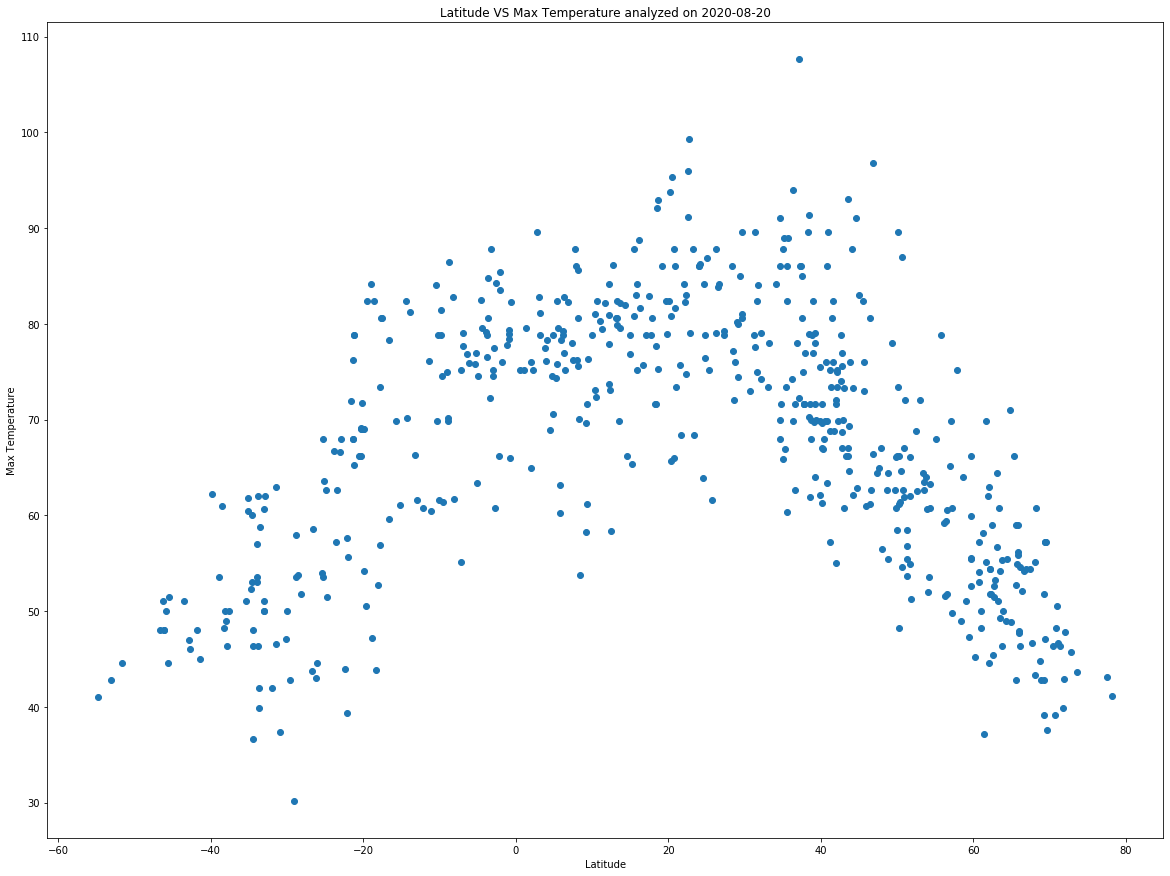

In [33]:
todayDate = datetime.now().date()
plt.figure(figsize = (20,15))
plt.scatter(cityWeather_Df['Lat'],cityWeather_Df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude VS Max Temperature analyzed on ' + str(todayDate))
plt.savefig("LatVsTemp.png")


## Latitude vs. Humidity Plot

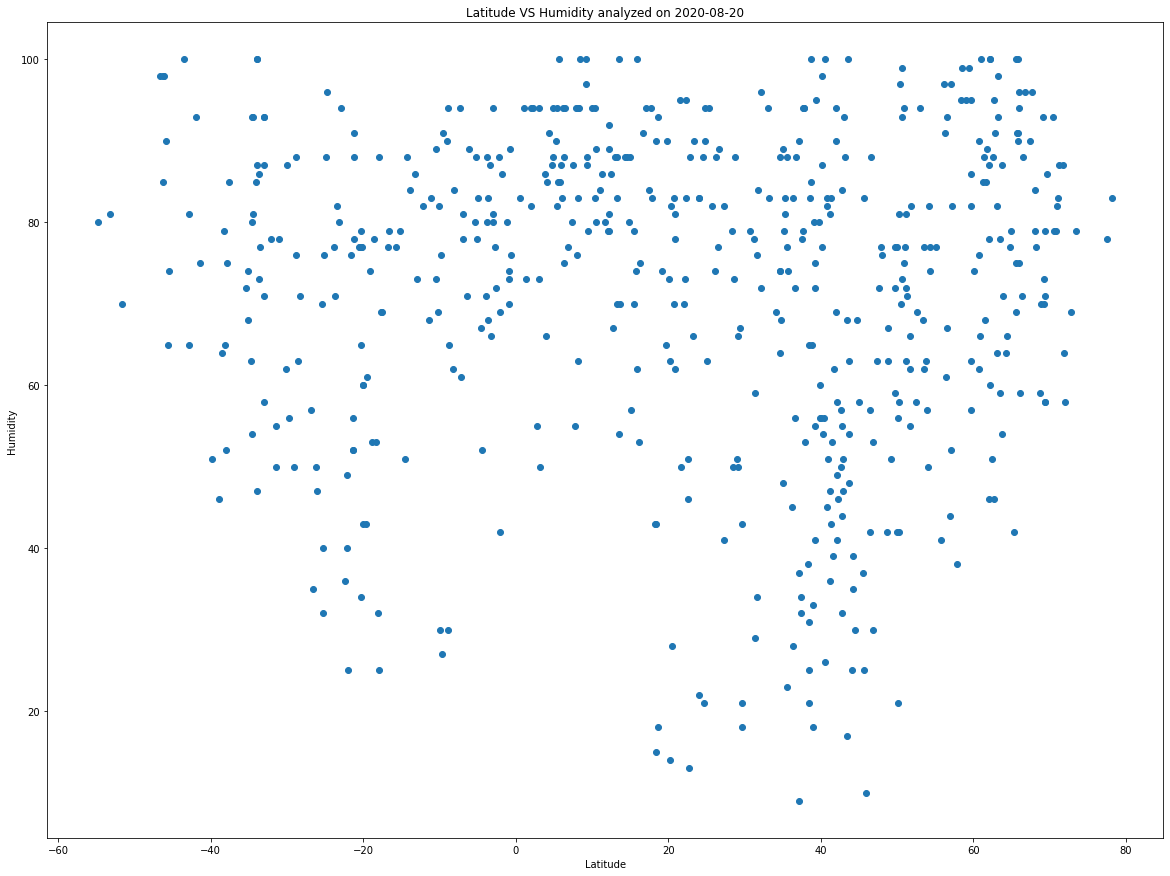

In [34]:
plt.figure(figsize = (20,15))
plt.scatter(cityWeather_Df['Lat'],cityWeather_Df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude VS Humidity analyzed on ' + str(todayDate))
plt.savefig("LatVsHumidity.png")

## Latitude vs. Cloudiness Plot

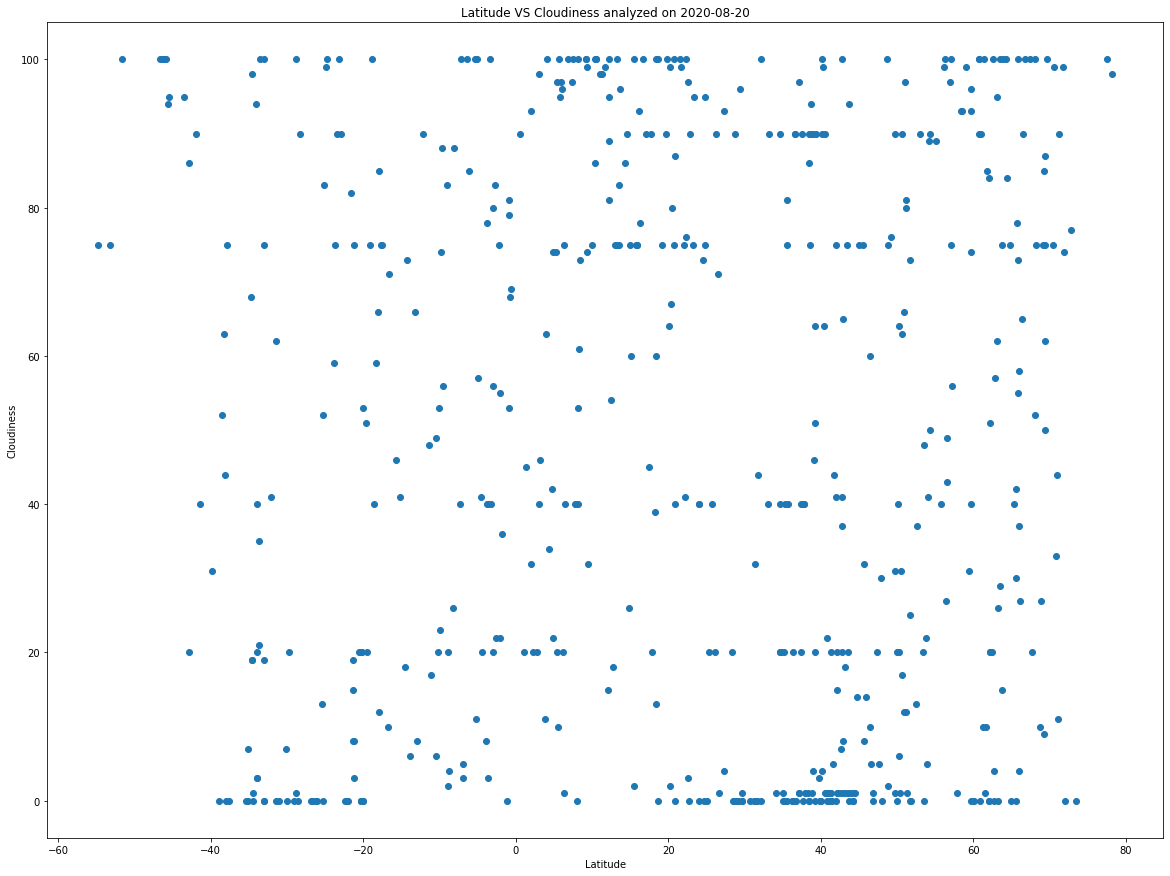

In [35]:
plt.figure(figsize = (20,15))
plt.scatter(cityWeather_Df['Lat'],cityWeather_Df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude VS Cloudiness analyzed on ' + str(todayDate))
plt.savefig("LatVsCloudiness.png")

## Latitude vs. Wind Speed Plot

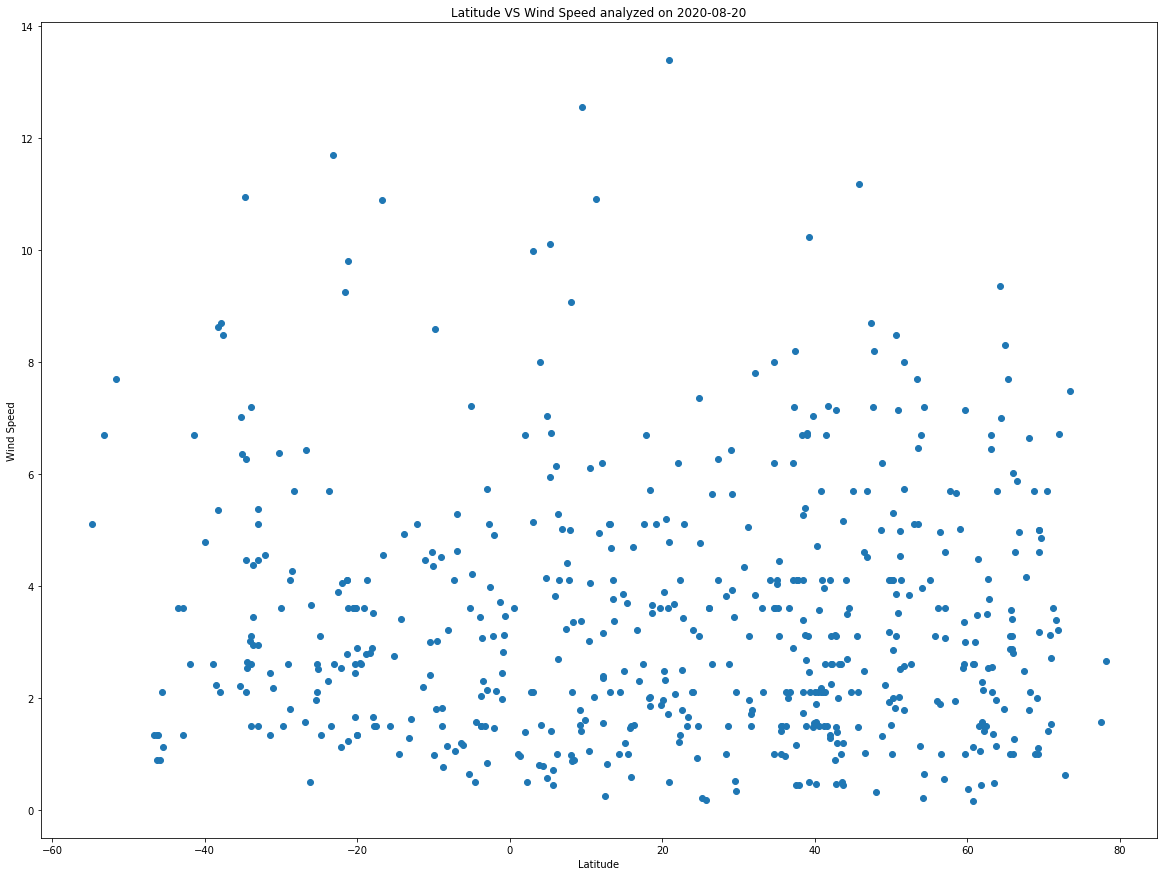

In [36]:
plt.figure(figsize = (20,15))
plt.scatter(cityWeather_Df['Lat'],cityWeather_Df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude VS Wind Speed analyzed on ' + str(todayDate))
plt.savefig("LatVsWindSpeed.png")

## Linear Regression

In [37]:
# OPTIONAL: Create a function to create Linear Regression plots

In [38]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression